#### Importing necessary packages


In [2]:
import tensorflow as tf
import tensorflow_datasets as tfds

#### Loading and preprocessing the data
##### Steps involed in preprocessing of MNIST
1- determining the hyperparams/constants <br>
2- scaling the data <br>
3- defining the size of validation dataset <br>
4- shuffling the data <br>
5- seperating te train and validation datasets <br>
6- batching the datasets <br>


In [11]:
# Defining some constants/hyperparameters
BUFFER_SIZE = 70_000 # for reshuffling
BATCH_SIZE = 128
NUM_EPOCHS = 20

In [3]:
#with_info returns the meta info about the dataset
mnist_data, mnist_info = tfds.load(name="mnist", as_supervised=True,with_info=True)


In [4]:
mnist_train, mnist_test = mnist_data['train'],mnist_data['test']

In [5]:
#defining the scale function to scale data between 0 and 1
def scale(image, label):
    image = tf.cast(image,tf.float32)
    image /= 255.
    return image, label

In [6]:
#scaling data by applying the function on the train and test data 
mnist_train_validation = mnist_train.map(scale)
test_data = mnist_test.map(scale)

In [9]:
#defining the size of validation set
validation_size = tf.cast(.1 * mnist_info.splits['train'].num_examples, tf.int64)
print(validation_size)

tf.Tensor(6000, shape=(), dtype=int64)


In [10]:
#defining the size of test set
test_size = tf.cast(mnist_info.splits['test'].num_examples,tf.int64)
print(test_size)

tf.Tensor(10000, shape=(), dtype=int64)


In [18]:
#reshuffling the dataset
mnist_train_validation = mnist_train_validation.shuffle(BUFFER_SIZE)

In [20]:
#splitting the train and validation datasets
#
train_data = mnist_train_validation.skip(validation_size)
validation_data = mnist_train_validation.take(validation_size)


In [21]:
#batching the data
train_data = train_data.batch(BATCH_SIZE)
validation_data = validation_data.batch(validation_size)
test_data = test_data.batch(test_size)

#### Creating the CNN model
the model architecture will be CONV-> MAXPOOL-> CONV-> MAXPOOL-> FLATTEN-> DENSE

In [28]:
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(50, 5, activation = 'relu', input_shape=(28,28,1)),
    tf.keras.layers.MaxPooling2D(pool_size =(2,2)),
    tf.keras.layers.Conv2D(50,3, activation = 'relu'),
    tf.keras.layers.MaxPooling2D(pool_size = (2,2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(10) # 10 digits to recognize
])

In [29]:
#summary of the model
model.summary(line_length=80)

Model: "sequential_1"
________________________________________________________________________________
Layer (type)                        Output Shape                    Param #     
conv2d_2 (Conv2D)                   (None, 24, 24, 50)              1300        
________________________________________________________________________________
max_pooling2d_2 (MaxPooling2D)      (None, 12, 12, 50)              0           
________________________________________________________________________________
conv2d_3 (Conv2D)                   (None, 10, 10, 50)              22550       
________________________________________________________________________________
max_pooling2d_3 (MaxPooling2D)      (None, 5, 5, 50)                0           
________________________________________________________________________________
flatten_1 (Flatten)                 (None, 1250)                    0           
________________________________________________________________________________
dense_

In [31]:
#incorporating the softmax into loss function
#when using the softmax activation, the loss can rarely be unstable
# use a loss calculation that automatically corrects for the missing softmax
loss_fn = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)

In [32]:
#compliling the model
model.compile(optimizer='adam',loss=loss_fn, metrics=['accuracy'])

In [34]:
#defining early stoping
early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor='val_loss',
    min_delta= 0,
    mode = 'auto',
    patience = 2,
    verbose = 2,
    restore_best_weights = True
)

In [39]:
#train the network
model.fit(
    train_data,
    epochs= NUM_EPOCHS,
    validation_data= validation_data,
    callbacks= [early_stopping],
    verbose=2
)

Epoch 1/20
422/422 - 25s - loss: 0.0703 - accuracy: 0.9789 - val_loss: 0.0581 - val_accuracy: 0.9818
Epoch 2/20
422/422 - 26s - loss: 0.0513 - accuracy: 0.9845 - val_loss: 0.0361 - val_accuracy: 0.9895
Epoch 3/20
422/422 - 25s - loss: 0.0396 - accuracy: 0.9880 - val_loss: 0.0418 - val_accuracy: 0.9863
Epoch 4/20
422/422 - 26s - loss: 0.0355 - accuracy: 0.9892 - val_loss: 0.0313 - val_accuracy: 0.9905
Epoch 5/20
422/422 - 26s - loss: 0.0310 - accuracy: 0.9901 - val_loss: 0.0237 - val_accuracy: 0.9932
Epoch 6/20
422/422 - 26s - loss: 0.0260 - accuracy: 0.9923 - val_loss: 0.0178 - val_accuracy: 0.9947
Epoch 7/20
422/422 - 25s - loss: 0.0231 - accuracy: 0.9928 - val_loss: 0.0161 - val_accuracy: 0.9960
Epoch 8/20
422/422 - 26s - loss: 0.0204 - accuracy: 0.9938 - val_loss: 0.0205 - val_accuracy: 0.9940
Epoch 9/20
422/422 - 26s - loss: 0.0175 - accuracy: 0.9943 - val_loss: 0.0190 - val_accuracy: 0.9932
Restoring model weights from the end of the best epoch.
Epoch 00009: early stopping


#### Testing the model

In [40]:
#evaluate returns the loss and metrics
test_loss, test_accuracy = model.evaluate(test_data)

1/1 [==============================] - 1s 1s/step - loss: 0.0275 - accuracy: 0.9907


In [41]:
print('test loss: {0: .4f}. test accuracy: {1: .2f}%'.format(test_loss, test_accuracy*100))

test loss:  0.0275. test accuracy:  99.07%


#### Plotting images and results

In [47]:
#importing libraries
import matplotlib.pyplot as plt
import numpy as np

In [48]:
#seperating test iamages and their labels into 2 arrays
for images, labels in test_data:
    images_test = images.numpy()
    labels_test = labels.numpy()
#reshaping the images for plotting
images_reshape = np.reshape(images_test,(10000,28,28))


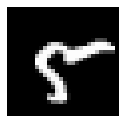

label: 5


In [73]:
#read an image and display it
i = 502
plt.figure(figsize=(2,2))
plt.axis('off')
plt.imshow(images_reshape[i-1], cmap='gray', aspect='auto')
plt.show()
print('label: {}'.format(labels_test[i-1]))

In [74]:
#obtain model preds
predictions = model.predict(images_test[i-1:i])
predictions

array([[ -5.889513 , -18.7005   , -18.572338 ,  -5.1432576,  -1.1506456,
          3.3093624,  -8.684445 ,  -1.2828286,   5.9344115,  -2.128931 ]],
      dtype=float32)

In [76]:
#converting predictions into probabilities
prob = tf.nn.softmax(predictions).numpy()
prob = prob *100
prob

array([[6.8200979e-04, 1.8622992e-09, 2.1169453e-09, 1.4384191e-03,
        7.7956930e-02, 6.7423553e+00, 4.1683801e-05, 6.8304345e-02,
        9.3079918e+01, 2.9308299e-02]], dtype=float32)

<BarContainer object of 10 artists>

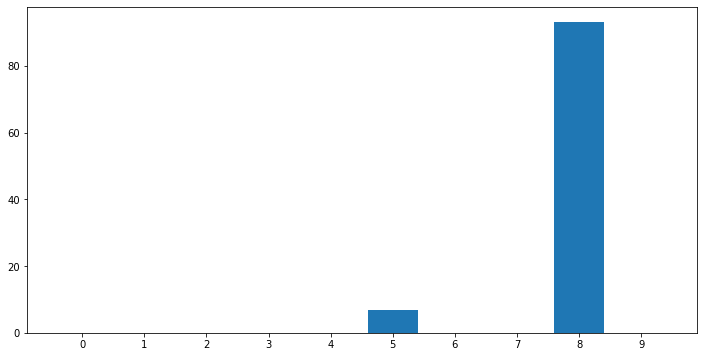

In [77]:
#plotting the probabilities for each class for the image i
plt.figure(figsize=(12,6))
plt.bar(x = [0,1,2,3,4,5,6,7,8,9], height= prob[0], tick_label = ["0","1","2","3","4","5","6","7","8","9"] )